# 카드소비내역 워드클라우드(wordcloud)제작

In [1]:
# 기본 패키지 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [2]:
from konlpy.tag import Kkma
from konlpy.tag import Mecab

import collections
from collections import Counter

In [3]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [5]:
# 전처리 후 파일 로드
raw_df = pd.read_csv('Data/Statistics_purpose_Prepreprocessing_compleated.csv')
df = raw_df.copy() # 복사
df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식        가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타        가족식사      남      가정친화    10대     100000          4   
2          일식생선회집        가족식사      남      가정친화    10대      12000          1   
3              중식        가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점        가족식사      남      가정친화    10대      30900          4   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt  
0       2018      1            12000  
1       2018      1            25000  
2       2018      1            12000  
3       2018      1            15000  
4       2018      1             7725  
...      ...    ...              ...  
293781  2019     12            49700  
293782  2019     12            95100  
293783  2019     12           122300  
293784  2019     12            17000  
293785  2019     12            16795  

[293786 rows x 10 columns]

In [7]:
df.head()

crdCoBzkNm sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  Year  \
0         양식      가족식사      남      가정친화    10대      12000          1  2018   
1    일반음식점기타      가족식사      남      가정친화    10대     100000          4  2018   
2     일식생선회집      가족식사      남      가정친화    10대      12000          1  2018   
3         중식      가족식사      남      가정친화    10대      30000          2  2018   
4    커피음료전문점      가족식사      남      가정친화    10대      30900          4  2018   

   Mouth  crdUseAmt_D_Cnt  
0      1            12000  
1      1            25000  
2      1            12000  
3      1            15000  
4      1             7725

In [8]:
grouped = df.groupby('sndCtgyNm')
grouped.size()

sndCtgyNm
가구/인테리어/건축자재       16167
가전제품                6858
가족식사               14607
건강식품                3492
결혼/장례서비스지원          6076
공예/토산품               366
관광(외국인전용점)            68
기념품                 1414
기부금                  974
레저/스포츠             18579
미용                 11268
병의원진료              18019
보험/금융               4097
생활용품                8621
생활편의시설(유통)         22348
선물용품                 859
숙박시설               10734
약국및의료기기구매           7008
여가활용                 357
여행/교통              10886
오락/문화/관람            6949
온누리(지역사랑)(개인구매)      112
온누리상품권(개인구매)          81
용역서비스               4854
운송/임대               1936
유아용품                  44
음료/식품              12186
의류/잡화              23601
자녀보육                5958
전자상거래              14189
제조/도매업관리            6219
차량서비스/차량연료         17466
취미생활               15474
컴퓨터/통신              5743
학습자재/도서구매           8404
학원수강                7772
dtype: int64

In [6]:
# 토큰 컬럼 추가
df['token'] = df['crdCoBzkNm'].apply(mecab.nouns)

In [10]:
df.groupby('sndCtgyNm').get_group('가족식사')

crdCoBzkNm sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식      가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타      가족식사      남      가정친화    10대     100000          4   
2          일식생선회집      가족식사      남      가정친화    10대      12000          1   
3              중식      가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점      가족식사      남      가정친화    10대      30900          4   
...           ...       ...    ...       ...    ...        ...        ...   
293732    일반음식점기타      가족식사      여      가정친화    80대      28700          1   
293733         한식      가족식사      여      가정친화    80대      74000          1   
293744         한식      가족식사      여      가정친화    80대     210000          2   
293755         한식      가족식사      여      가정친화    80대      34000          1   
293761      휴게음식점      가족식사      여      가정친화    80대       7400          1   

        Year  Mouth  crdUseAmt_D_Cnt          token  
0       2018      1            12000           [양식]  
1       2018      1            25000  [일반, 음식점, 기타]  
2       2018      1            12000   [일식, 생선, 회집]  
3       2018      1            15000           [중식]  
4       2018      1             7725  [커피, 음료, 전문점]  
...      ...    ...              ...            ...  
293732  2019      5            28700  [일반, 음식점, 기타]  
293733  2019      5            74000           [한식]  
293744  2019      7           105000           [한식]  
293755  2019      9            34000           [한식]  
293761  2019     10             7400      [휴게, 음식점]  

[14607 rows x 11 columns]

In [12]:
# for snd, group_data in df[['crdCoBzkNm','sndCtgyNm','fstCtgyNm']].groupby('sndCtgyNm'):
#     print(snd)
#     print(group_data[:100])

In [13]:
for snd, group_data in df[['crdCoBzkNm','sndCtgyNm']].groupby('sndCtgyNm'):
    print(snd)
    group_data['token'] = group_data['crdCoBzkNm'].apply(mecab.nouns)
    new = group_data[['token']]
    print(new)

가구/인테리어/건축자재
              token
276            [지물]
416            [지물]
765            [지물]
852        [건축, 자재]
853        [철제, 구점]
...             ...
293375     [건축, 자재]
293376        [철물점]
293473   [인테리어, 소품]
293474  [일반, 가구, 점]
293583  [일반, 가구, 점]

[16167 rows x 1 columns]
가전제품
               token
10         [가전제품, 점]
414        [가전제품, 점]
493        [가전제품, 점]
627     [기타, 전자, 제품]
942        [가전제품, 점]
...              ...
293245       [자동판매기]
293369     [가전제품, 점]
293466  [가전, 전기, 제품]
293467     [가전제품, 점]
293578     [가전제품, 점]

[6858 rows x 1 columns]
가족식사
                token
0                [양식]
1       [일반, 음식점, 기타]
2        [일식, 생선, 회집]
3                [중식]
4       [커피, 음료, 전문점]
...               ...
293732  [일반, 음식점, 기타]
293733           [한식]
293744           [한식]
293755           [한식]
293761      [휴게, 음식점]

[14607 rows x 1 columns]
건강식품
               token
637        [인삼, 판매점]
2211    [건강, 보조, 식품]
2212       [건강, 식품점]
2213       [기타, 건강식]
2214    [인삼, 건강, 제품]
...          

## stopwords 빼기(이상해짐)

In [14]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import STOPWORDS

In [16]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [17]:
# s_file = open('Stopwords.txt','r',encoding='utf-8')
# s_list = []
# for line in s_file.readlines():
#     s_list.append(line.rstrip())
# s_file.close()
# stopwords=s_list

In [18]:
# stop_words = "기타 일반 용품 기기 점 홈" 
# stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분
# result=[]

# #word_tokens = word_tokenize(example)

# for w in df_toy_named:
#     if w not in stop_words:
#         result.append(w)

In [19]:
# result # stopwords 제거후

In [20]:
# tokenizer=Tokenizer()
# tokenizer.fit_on_texts(result)                     # 단어 인덱스 생성
# tm2=tokenizer.texts_to_matrix(result, mode='count') # 카운트기반 매트릭스 생성
# tm2

In [21]:
# # Key값을 컬럼명으로 갖는 DF 생성
# df_toy_named2=pd.DataFrame(tm2).loc[:,1:]
# df_toy_named2.columns = list(tokenizer.word_index.keys())
# df_toy_named2.astype(int)

In [22]:
import collections
# frequency_d = collections.Counter(df_toy_named2)

## mask 이미지 지정

In [8]:
# mask 이미지 지정
from PIL import Image
mask = Image.open("data/cloud.png")
mask = np.array(mask)

In [11]:
mask_head = Image.open("data/hhh.png")
mask_head = np.array(mask_head)

## 2차분류 전체 워드클라우드

In [12]:
from wordcloud import WordCloud

In [9]:
df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식        가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타        가족식사      남      가정친화    10대     100000          4   
2          일식생선회집        가족식사      남      가정친화    10대      12000          1   
3              중식        가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점        가족식사      남      가정친화    10대      30900          4   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
0       2018      1            12000              [양식]  
1       2018      1            25000     [일반, 음식점, 기타]  
2       2018      1            12000      [일식, 생선, 회집]  
3       2018      1            15000              [중식]  
4       2018      1             7725     [커피, 음료, 전문점]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[293786 rows x 11 columns]

In [10]:
df['token'][1]+df['token'][0]

['일반', '음식점', '기타', '양식']

In [14]:
df_list = []
for df_t in df['token']:
    df_list += df_t

In [21]:
CC = Counter(df_list).most_common()

In [22]:
# stopword.add("")

In [23]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 수단 퓨 렌 영 소" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분
result=[]

for w in CC:
    if w[0] not in stop_words:
        result.append(w)

In [19]:
result

[('학원', 6181),
 ('스포츠', 6128),
 ('판매', 5559),
 ('의류', 5556),
 ('종합', 5235),
 ('판매점', 4958),
 ('병원', 4670),
 ('통신', 4527),
 ('식품', 4410),
 ('서비스', 4378),
 ('자동차', 3790),
 ('농협', 3769),
 ('주방', 3762),
 ('전자', 3709),
 ('의료', 3693),
 ('제조', 3434),
 ('제품', 3432),
 ('전문점', 3286),
 ('사무', 3286),
 ('건강', 3277),
 ('보험', 3227),
 ('매장', 3208),
 ('레져', 3144),
 ('교육', 3066),
 ('컴퓨터', 3059),
 ('상거래', 3058),
 ('기구', 2997),
 ('가구', 2976),
 ('충전', 2867),
 ('기계', 2845),
 ('주유소', 2840),
 ('가스', 2838),
 ('음식점', 2781),
 ('기관', 2767),
 ('건축', 2760),
 ('레저', 2744),
 ('차량', 2716),
 ('대형', 2545),
 ('의원', 2527),
 ('치과', 2486),
 ('부품', 2399),
 ('인테리어', 2366),
 ('복점', 2345),
 ('센터', 2302),
 ('쇼핑', 2255),
 ('대학', 2218),
 ('정수기', 2195),
 ('자재', 2143),
 ('업', 2141),
 ('급호', 2110),
 ('텔', 2110),
 ('복지', 2107),
 ('동물', 2100),
 ('정비', 2078),
 ('시설', 2062),
 ('장', 2048),
 ('제약', 2041),
 ('호텔', 2009),
 ('인터넷', 1999),
 ('서적', 1970),
 ('도매', 1894),
 ('슈퍼마켓', 1865),
 ('마트', 1850),
 ('관광호텔', 1850),
 ('침구', 1845),
 ('수리', 184

In [24]:
res_dict = dict(result) # 리스트를 딕셔너리로

In [18]:
res_dict

{'학원': 6181,
 '스포츠': 6128,
 '판매': 5559,
 '의류': 5556,
 '종합': 5235,
 '판매점': 4958,
 '병원': 4670,
 '통신': 4527,
 '식품': 4410,
 '서비스': 4378,
 '자동차': 3790,
 '농협': 3769,
 '주방': 3762,
 '전자': 3709,
 '의료': 3693,
 '제조': 3434,
 '제품': 3432,
 '전문점': 3286,
 '사무': 3286,
 '건강': 3277,
 '보험': 3227,
 '매장': 3208,
 '레져': 3144,
 '교육': 3066,
 '컴퓨터': 3059,
 '상거래': 3058,
 '기구': 2997,
 '가구': 2976,
 '충전': 2867,
 '기계': 2845,
 '주유소': 2840,
 '가스': 2838,
 '음식점': 2781,
 '기관': 2767,
 '건축': 2760,
 '레저': 2744,
 '차량': 2716,
 '대형': 2545,
 '의원': 2527,
 '치과': 2486,
 '부품': 2399,
 '인테리어': 2366,
 '복점': 2345,
 '센터': 2302,
 '쇼핑': 2255,
 '대학': 2218,
 '정수기': 2195,
 '자재': 2143,
 '업': 2141,
 '급호': 2110,
 '텔': 2110,
 '복지': 2107,
 '동물': 2100,
 '정비': 2078,
 '시설': 2062,
 '장': 2048,
 '제약': 2041,
 '호텔': 2009,
 '인터넷': 1999,
 '서적': 1970,
 '도매': 1894,
 '슈퍼마켓': 1865,
 '마트': 1850,
 '관광호텔': 1850,
 '침구': 1845,
 '수리': 1842,
 '특급': 1837,
 '조명': 1836,
 '전기': 1824,
 '일식': 1820,
 '실내': 1786,
 '가방': 1755,
 '전문': 1704,
 '운송': 1678,
 '농수': 1674,
 '문구': 1657

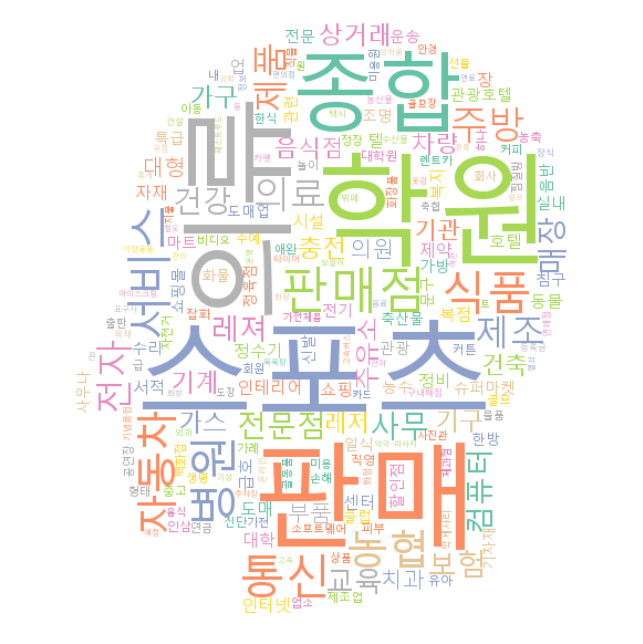

In [131]:
plt.figure(dpi=200)
#fontpath = 'malgun'

wordcloud = WordCloud(font_path='malgun', mask=mask_head, background_color='white', colormap='Set2')
wordcloud = wordcloud.generate_from_frequencies(res_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('2차분류 전체기준 워드클라우드-4.png')

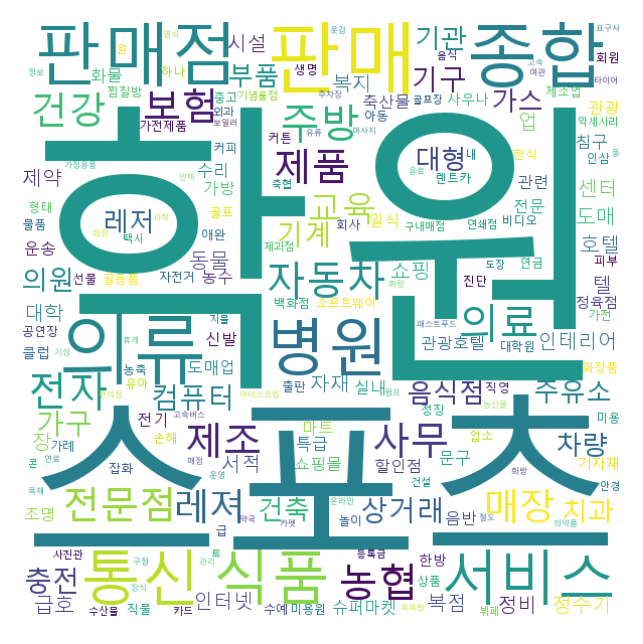

In [39]:
# 사각형 워드클라우드
plt.figure(dpi=200)
wc = WordCloud(font_path="malgun", width=300, height=300, background_color="white",
               max_words=200, max_font_size=250,
               #min_font_size=3,
               prefer_horizontal=True, # 글자 가로로
               scale=2.0).fit_words(res_dict)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## 앨리스 컬러 png 워드클라우드

In [106]:
from wordcloud import ImageColorGenerator
alice_coloring=np.array(Image.open("data/alice_color.png"))
image_color=ImageColorGenerator(alice_coloring)

In [107]:
#alice_coloring

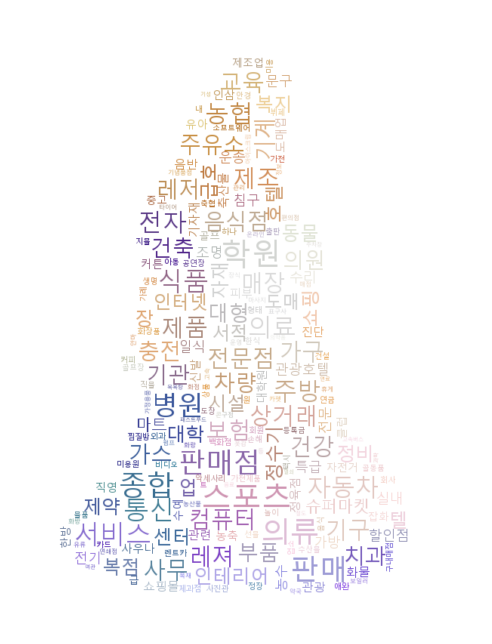

In [108]:
plt.figure(dpi=200)
fontpath = 'malgun'

wordcloud = WordCloud(font_path=fontpath, mask=alice_coloring, background_color='white', max_font_size=40)
wordcloud = wordcloud.generate_from_frequencies(res_dict)

plt.imshow(wordcloud.recolor(color_func=image_color), interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 1200x800 with 0 Axes>

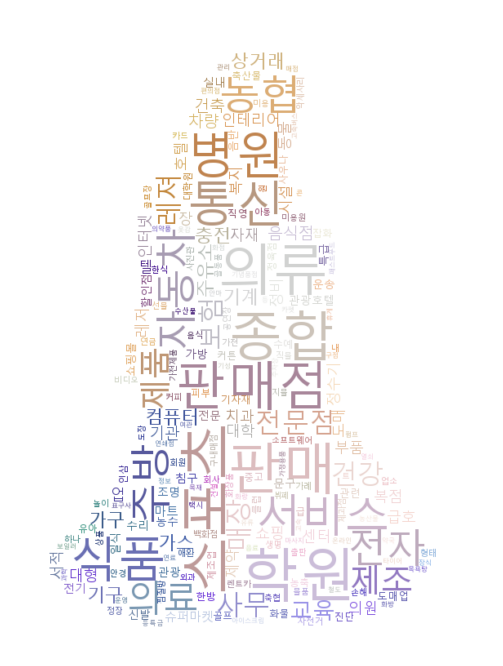

In [43]:
# 폰트사이즈 키워서
plt.figure(dpi=200)
wc = WordCloud(font_path = 'malgun', background_color='white', mask=alice_coloring, max_font_size=70) # 폰트지정안해줘서 빈칸뜸
wordcloud = wc.generate_from_frequencies(res_dict)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_color), interpolation='bilinear')
plt.axis('off')
plt.show()

## mask변경

In [28]:
mask_men = Image.open("data/mmm.png")
mask_men = np.array(mask_men)

FileNotFoundError: [Errno 2] No such file or directory: 'data/mmm.png'

In [27]:
#mask

In [46]:
# men_coloring=np.array(Image.open("men.png"))
# image_men=ImageColorGenerator(men_coloring)

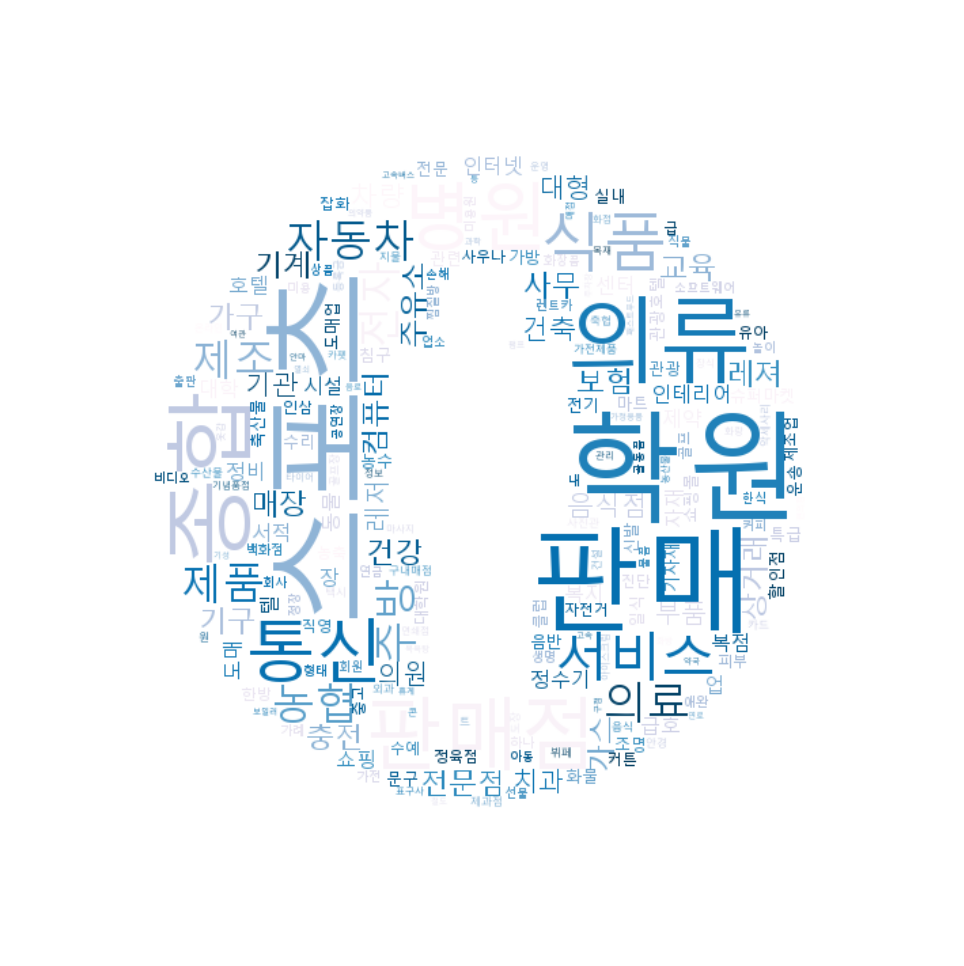

In [47]:
plt.figure(dpi=300)
#fontpath = 'malgun'

wordcloud = WordCloud(font_path='malgun', mask=mask_men, background_color='white', colormap='PuBu')

wordcloud = wordcloud.generate_from_frequencies(res_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
www_coloring=np.array(Image.open("www.png"))
imagewww_color=ImageColorGenerator(www_coloring)

<Figure size 1800x1200 with 0 Axes>

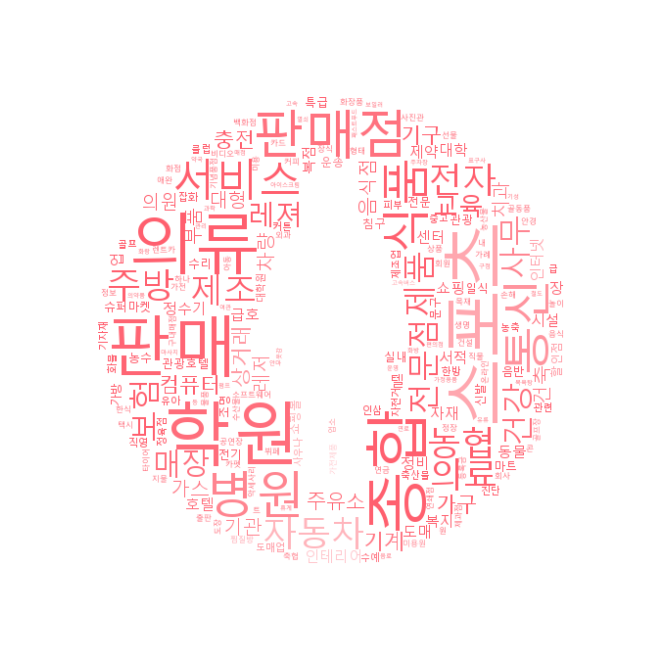

In [49]:
# 폰트사이즈 키워서
plt.figure(dpi=300)
wc = WordCloud(font_path = 'malgun', background_color='white', mask=www_coloring, max_font_size=70) # 폰트지정안해줘서 빈칸뜸
wordcloud = wc.generate_from_frequencies(res_dict)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=imagewww_color), interpolation='bilinear')
plt.axis('off')
plt.show()

## 2차분류 [가족식사] 워드클라우드

In [50]:
family_food = df.groupby('sndCtgyNm').get_group('가족식사')
family_food

crdCoBzkNm sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식      가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타      가족식사      남      가정친화    10대     100000          4   
2          일식생선회집      가족식사      남      가정친화    10대      12000          1   
3              중식      가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점      가족식사      남      가정친화    10대      30900          4   
...           ...       ...    ...       ...    ...        ...        ...   
293732    일반음식점기타      가족식사      여      가정친화    80대      28700          1   
293733         한식      가족식사      여      가정친화    80대      74000          1   
293744         한식      가족식사      여      가정친화    80대     210000          2   
293755         한식      가족식사      여      가정친화    80대      34000          1   
293761      휴게음식점      가족식사      여      가정친화    80대       7400          1   

        Year  Mouth  crdUseAmt_D_Cnt          token  
0       2018      1            12000           [양식]  
1       2018      1            25000  [일반, 음식점, 기타]  
2       2018      1            12000   [일식, 생선, 회집]  
3       2018      1            15000           [중식]  
4       2018      1             7725  [커피, 음료, 전문점]  
...      ...    ...              ...            ...  
293732  2019      5            28700  [일반, 음식점, 기타]  
293733  2019      5            74000           [한식]  
293744  2019      7           105000           [한식]  
293755  2019      9            34000           [한식]  
293761  2019     10             7400      [휴게, 음식점]  

[14607 rows x 11 columns]

In [51]:
familiy_list = []
for f in family_food['token']:
    familiy_list += f

In [52]:
familiy_list

['양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '패스트푸드',
 '점',
 '한식',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '커피',
 '전문점',
 '패밀리',
 '레스토랑',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패밀리',
 '레스토랑',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '점',
 '한식',
 '기타',
 '휴게',
 '음식점',
 '뷔페',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패밀리',
 '레스토랑',
 '패스트푸드',
 '점',
 '한식

In [53]:
FW = Counter(familiy_list).most_common()

In [54]:
stop_words = "음식점 일반 기타 점 넥 간" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분
result=[]

for w in FW:
    if w[0] not in stop_words:
        result.append(w)

In [55]:
result

[('전문점', 2045),
 ('일식', 1820),
 ('커피', 1319),
 ('한식', 1282),
 ('음식', 1158),
 ('뷔페', 1106),
 ('휴게', 905),
 ('패스트푸드', 888),
 ('횟집', 788),
 ('생선', 612),
 ('회집', 612),
 ('중식', 475),
 ('양식', 467),
 ('음료', 451),
 ('서양', 421),
 ('중국', 399),
 ('치킨', 391),
 ('패밀리', 389),
 ('레스토랑', 389),
 ('서양식', 384),
 ('커피숍', 384),
 ('위탁', 378),
 ('급', 378),
 ('식업', 378),
 ('중국식', 378),
 ('출장', 358),
 ('연회', 358),
 ('정식', 339),
 ('갈비', 335),
 ('한정식', 261)]

In [56]:
FW_dict = dict(result)

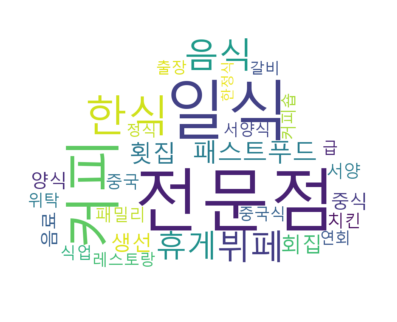

In [57]:
plt.figure(dpi=100)
#fontpath = 'malgun'

wordcloud = WordCloud(font_path='malgun', mask=mask, background_color='white')

wordcloud = wordcloud.generate_from_frequencies(FW_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 성별 남자

In [58]:
df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식        가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타        가족식사      남      가정친화    10대     100000          4   
2          일식생선회집        가족식사      남      가정친화    10대      12000          1   
3              중식        가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점        가족식사      남      가정친화    10대      30900          4   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
0       2018      1            12000              [양식]  
1       2018      1            25000     [일반, 음식점, 기타]  
2       2018      1            12000      [일식, 생선, 회집]  
3       2018      1            15000              [중식]  
4       2018      1             7725     [커피, 음료, 전문점]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[293786 rows x 11 columns]

In [29]:
men_df = df.groupby('sxClNm').get_group('남')

In [30]:
men_list=[]
for men in men_df['token']:
    men_list += men

In [31]:
men_list

['양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '패스트푸드',
 '점',
 '한식',
 '제과점',
 '아이스크림',
 '점',
 '가전제품',
 '점',
 '컴퓨터',
 '소프트웨어',
 '주유소',
 '일반',
 '치과',
 '의원',
 '약국',
 '생명',
 '보험',
 '문방구점',
 '서점',
 '교통',
 '기관',
 '수수료',
 '선취',
 '철도',
 '비디오',
 '도서대',
 '여점',
 '공연장',
 '극장',
 '영화관',
 '공공',
 '기관',
 '직영',
 '점',
 '슈퍼마켓',
 '편의점',
 '하나',
 '마트',
 '인터넷',
 '쇼핑몰',
 '전자',
 '상거래',
 '안심',
 '클릭',
 '미',
 '적용',
 '전자',
 '상거래',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '커피',
 '전문점',
 '패밀리',
 '레스토랑',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '제과점',
 '아이스크림',
 '점',
 '기성',
 '복점',
 '농협',
 '주유소',
 '주유소',
 '약국',
 '자동차',
 '학원',
 '서점',
 '종합',
 '스포츠',
 '센터',
 '화장품',
 '점',
 '교통',
 '기관',
 '수수료',
 '선취',
 '고속버스',
 '철도',
 '공공',
 '기관',
 '직영',
 '점',
 '대형',
 '마트',
 '백화점',
 '슈퍼마켓',
 '편의점',
 '인터넷',
 '쇼핑몰',
 '전자',
 '상거래',
 '안심',
 '클릭',
 '미',
 '적용',
 '전자',
 '상거래',
 '가정용품',
 '수리',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집

In [32]:
men_c = Counter(df_list).most_common()
men_c

[('기타', 31839),
 ('점', 14072),
 ('용품', 13615),
 ('일반', 8416),
 ('기기', 6403),
 ('학원', 6181),
 ('스포츠', 6128),
 ('판매', 5559),
 ('의류', 5556),
 ('종합', 5235),
 ('판매점', 4958),
 ('병원', 4670),
 ('통신', 4527),
 ('식품', 4410),
 ('서비스', 4378),
 ('자동차', 3790),
 ('농협', 3769),
 ('주방', 3762),
 ('전자', 3709),
 ('의료', 3693),
 ('제조', 3434),
 ('제품', 3432),
 ('전문점', 3286),
 ('사무', 3286),
 ('건강', 3277),
 ('보험', 3227),
 ('매장', 3208),
 ('레져', 3144),
 ('소', 3118),
 ('교육', 3066),
 ('컴퓨터', 3059),
 ('상거래', 3058),
 ('기구', 2997),
 ('가구', 2976),
 ('충전', 2867),
 ('기계', 2845),
 ('주유소', 2840),
 ('가스', 2838),
 ('음식점', 2781),
 ('기관', 2767),
 ('건축', 2760),
 ('레저', 2744),
 ('차량', 2716),
 ('대형', 2545),
 ('의원', 2527),
 ('치과', 2486),
 ('부품', 2399),
 ('인테리어', 2366),
 ('복점', 2345),
 ('센터', 2302),
 ('쇼핑', 2255),
 ('대학', 2218),
 ('정수기', 2195),
 ('자재', 2143),
 ('업', 2141),
 ('급호', 2110),
 ('텔', 2110),
 ('복지', 2107),
 ('동물', 2100),
 ('정비', 2078),
 ('시설', 2062),
 ('장', 2048),
 ('제약', 2041),
 ('호텔', 2009),
 ('인터넷', 1999),
 ('서적', 1970),

In [34]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 수단 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분
men_result=[]

for w in men_c:
    if w[0] not in stop_words:
        men_result.append(w)

In [35]:
men_result

[('학원', 6181),
 ('스포츠', 6128),
 ('판매', 5559),
 ('의류', 5556),
 ('종합', 5235),
 ('판매점', 4958),
 ('병원', 4670),
 ('통신', 4527),
 ('식품', 4410),
 ('서비스', 4378),
 ('자동차', 3790),
 ('농협', 3769),
 ('주방', 3762),
 ('전자', 3709),
 ('의료', 3693),
 ('제조', 3434),
 ('제품', 3432),
 ('전문점', 3286),
 ('사무', 3286),
 ('건강', 3277),
 ('보험', 3227),
 ('매장', 3208),
 ('레져', 3144),
 ('소', 3118),
 ('교육', 3066),
 ('컴퓨터', 3059),
 ('상거래', 3058),
 ('기구', 2997),
 ('가구', 2976),
 ('충전', 2867),
 ('기계', 2845),
 ('주유소', 2840),
 ('가스', 2838),
 ('음식점', 2781),
 ('기관', 2767),
 ('건축', 2760),
 ('레저', 2744),
 ('차량', 2716),
 ('대형', 2545),
 ('의원', 2527),
 ('치과', 2486),
 ('부품', 2399),
 ('인테리어', 2366),
 ('복점', 2345),
 ('센터', 2302),
 ('쇼핑', 2255),
 ('대학', 2218),
 ('정수기', 2195),
 ('자재', 2143),
 ('업', 2141),
 ('급호', 2110),
 ('텔', 2110),
 ('복지', 2107),
 ('동물', 2100),
 ('정비', 2078),
 ('시설', 2062),
 ('장', 2048),
 ('제약', 2041),
 ('호텔', 2009),
 ('인터넷', 1999),
 ('서적', 1970),
 ('도매', 1894),
 ('슈퍼마켓', 1865),
 ('마트', 1850),
 ('관광호텔', 1850),
 ('침구', 1845

In [36]:
men_dict = dict(men_result)

In [38]:
from wordcloud import ImageColorGenerator
mm_coloring=np.array(Image.open("data/mm.png"))
imagemm_color=ImageColorGenerator(mm_coloring)

<Figure size 4800x3200 with 0 Axes>

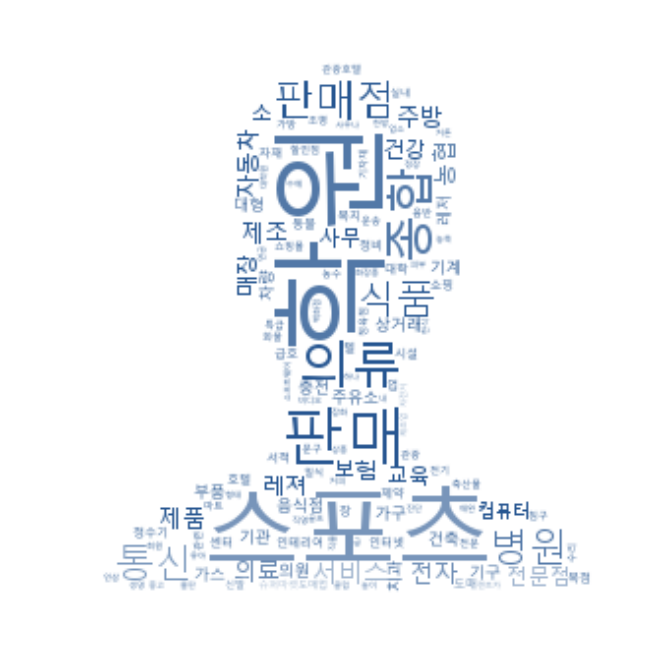

In [58]:
# 폰트사이즈 키워서
plt.figure(dpi=800)
wc = WordCloud(font_path = 'malgun', background_color='white', mask=mm_coloring, max_font_size=60)
wordcloud = wc.generate_from_frequencies(men_dict)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=imagemm_color), interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('성별 남성 기준 워드클라우드.png')

## 성별 여자

In [45]:
women_df = df.groupby('sxClNm').get_group('여')
women_df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
147492     일식생선회집        가족식사      여      가정친화    10대      33500          2   
147493         중식        가족식사      여      가정친화    10대      18000          1   
147494    커피음료전문점        가족식사      여      가정친화    10대      16000          1   
147495      커피전문점        가족식사      여      가정친화    10대     106000         12   
147496      패스트푸드        가족식사      여      가정친화    10대       9800          2   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
147492  2018      1            16750      [일식, 생선, 회집]  
147493  2018      1            18000              [중식]  
147494  2018      1            16000     [커피, 음료, 전문점]  
147495  2018      1             8833         [커피, 전문점]  
147496  2018      1             4900           [패스트푸드]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[146294 rows x 11 columns]

In [46]:
wom_list = []
for wom in women_df['token']:
    wom_list += wom

In [47]:
wom_list

['일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '정육점',
 '제과점',
 '제과점',
 '아이스크림',
 '점',
 '제과점',
 '아이스크림',
 '점',
 '기성',
 '복점',
 '기타',
 '의류',
 '남여',
 '기성복',
 '내',
 '판매점',
 '악세사리',
 '점',
 '주유소',
 '주차장',
 '일반',
 '치과',
 '한방',
 '병원',
 '일반',
 '치과',
 '의원',
 '종합',
 '병원',
 '약국',
 '문방구점',
 '서점',
 '화장품',
 '점',
 '교통',
 '기관',
 '수수료',
 '선취',
 '고속',
 '시외버스',
 '고속버스',
 '철도',
 '택시',
 '애완',
 '동물',
 '영화관',
 '대형',
 '마트',
 '백화점',
 '슈퍼마켓',
 '편의점',
 '하나',
 '마트',
 '할인점',
 '슈퍼마켓',
 '인터넷',
 '쇼핑몰',
 '전자',
 '상거래',
 '전자',
 '상거래',
 '안심',
 '클릭',
 '미',
 '적용',
 '전자',
 '상거래',
 '전자',
 '상거래',
 '오픈',
 '마켓',
 '사진관',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '정육점',
 '제과점',
 '제과점',
 '아이스크림',
 '점',
 '제과점',
 

In [48]:
wom_c = Counter(wom_list).most_common()
wom_c

[('기타', 15902),
 ('점', 6965),
 ('용품', 6865),
 ('일반', 4167),
 ('기기', 3188),
 ('학원', 3090),
 ('스포츠', 3071),
 ('의류', 2888),
 ('판매', 2758),
 ('종합', 2597),
 ('판매점', 2449),
 ('병원', 2331),
 ('통신', 2302),
 ('식품', 2236),
 ('서비스', 2156),
 ('의료', 1880),
 ('주방', 1869),
 ('농협', 1832),
 ('자동차', 1819),
 ('전자', 1813),
 ('제품', 1755),
 ('제조', 1688),
 ('건강', 1664),
 ('사무', 1656),
 ('전문점', 1619),
 ('교육', 1593),
 ('레져', 1581),
 ('매장', 1564),
 ('보험', 1557),
 ('컴퓨터', 1514),
 ('상거래', 1496),
 ('소', 1491),
 ('가구', 1482),
 ('기구', 1461),
 ('기계', 1440),
 ('기관', 1394),
 ('충전', 1378),
 ('가스', 1358),
 ('레저', 1353),
 ('음식점', 1350),
 ('주유소', 1336),
 ('건축', 1324),
 ('차량', 1286),
 ('의원', 1259),
 ('대형', 1236),
 ('치과', 1213),
 ('복점', 1194),
 ('인테리어', 1174),
 ('부품', 1147),
 ('쇼핑', 1134),
 ('센터', 1120),
 ('업', 1090),
 ('정수기', 1088),
 ('대학', 1076),
 ('동물', 1075),
 ('급호', 1049),
 ('텔', 1049),
 ('시설', 1046),
 ('자재', 1042),
 ('복지', 1040),
 ('장', 1030),
 ('호텔', 1026),
 ('제약', 1020),
 ('서적', 985),
 ('정비', 974),
 ('인터넷', 954),
 ('도

In [49]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 수단 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분
women_result = []

for w in wom_c:
    if w[0] not in stop_words:
        women_result.append(w)

In [50]:
women_result

[('학원', 3090),
 ('스포츠', 3071),
 ('의류', 2888),
 ('판매', 2758),
 ('종합', 2597),
 ('판매점', 2449),
 ('병원', 2331),
 ('통신', 2302),
 ('식품', 2236),
 ('서비스', 2156),
 ('의료', 1880),
 ('주방', 1869),
 ('농협', 1832),
 ('자동차', 1819),
 ('전자', 1813),
 ('제품', 1755),
 ('제조', 1688),
 ('건강', 1664),
 ('사무', 1656),
 ('전문점', 1619),
 ('교육', 1593),
 ('레져', 1581),
 ('매장', 1564),
 ('보험', 1557),
 ('컴퓨터', 1514),
 ('상거래', 1496),
 ('소', 1491),
 ('가구', 1482),
 ('기구', 1461),
 ('기계', 1440),
 ('기관', 1394),
 ('충전', 1378),
 ('가스', 1358),
 ('레저', 1353),
 ('음식점', 1350),
 ('주유소', 1336),
 ('건축', 1324),
 ('차량', 1286),
 ('의원', 1259),
 ('대형', 1236),
 ('치과', 1213),
 ('복점', 1194),
 ('인테리어', 1174),
 ('부품', 1147),
 ('쇼핑', 1134),
 ('센터', 1120),
 ('업', 1090),
 ('정수기', 1088),
 ('대학', 1076),
 ('동물', 1075),
 ('급호', 1049),
 ('텔', 1049),
 ('시설', 1046),
 ('자재', 1042),
 ('복지', 1040),
 ('장', 1030),
 ('호텔', 1026),
 ('제약', 1020),
 ('서적', 985),
 ('정비', 974),
 ('인터넷', 954),
 ('도매', 935),
 ('침구', 928),
 ('슈퍼마켓', 920),
 ('특급', 919),
 ('관광호텔', 907),
 ('마트

In [51]:
women_dict = dict(women_result)

<Figure size 1800x1200 with 0 Axes>

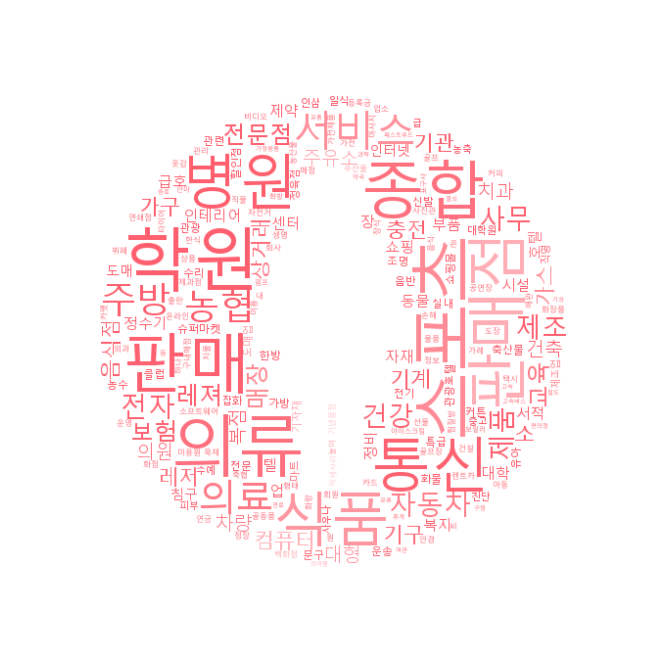

In [78]:
# 폰트사이즈 키워서
plt.figure(dpi=300)
wc = WordCloud(font_path = 'malgun', background_color='white', mask=www_coloring, max_font_size=60)
wordcloud = wc.generate_from_frequencies(women_dict)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=imagewww_color), interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
ww_coloring=np.array(Image.open("data/ww.png"))
imageww_color=ImageColorGenerator(ww_coloring)

<Figure size 1800x1200 with 0 Axes>

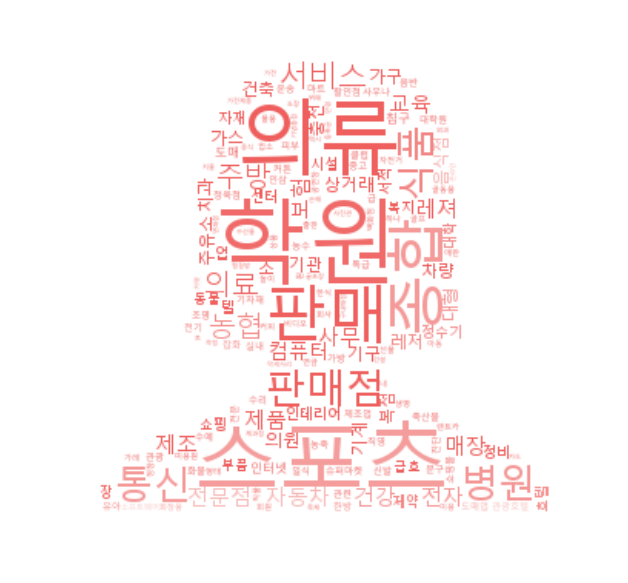

In [59]:
# 폰트사이즈 키워서
plt.figure(dpi=300)
wc = WordCloud(font_path = 'malgun', background_color='white', mask=ww_coloring, max_font_size=60)
wordcloud = wc.generate_from_frequencies(women_dict)

plt.figure(figsize=(11,11))
plt.imshow(wc.recolor(color_func=imageww_color), interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('성별 여성 기준 워드클라우드.png')

In [81]:
# women = women_df['crdCoBzkNm'].apply(mecab.nouns)
# women.tolist()

In [82]:
# tokenizer=Tokenizer()
# tokenizer.fit_on_texts(women)
# women_word = tokenizer.word_index
# print(women_word)

In [83]:
# Women_comm = Counter(women_word).most_common()
# Women_comm

## 연령별 10대 확인

In [84]:
df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식        가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타        가족식사      남      가정친화    10대     100000          4   
2          일식생선회집        가족식사      남      가정친화    10대      12000          1   
3              중식        가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점        가족식사      남      가정친화    10대      30900          4   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
0       2018      1            12000              [양식]  
1       2018      1            25000     [일반, 음식점, 기타]  
2       2018      1            12000      [일식, 생선, 회집]  
3       2018      1            15000              [중식]  
4       2018      1             7725     [커피, 음료, 전문점]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[293786 rows x 11 columns]

In [85]:
age_grouped_ten = df.groupby('agePrd').get_group('10대')
age_grouped_ten

crdCoBzkNm sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식      가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타      가족식사      남      가정친화    10대     100000          4   
2          일식생선회집      가족식사      남      가정친화    10대      12000          1   
3              중식      가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점      가족식사      남      가정친화    10대      30900          4   
...           ...       ...    ...       ...    ...        ...        ...   
149550    전자상거래PG     전자상거래      여      여가생활    10대    5362267        170   
149551  전자상거래오픈마켓     전자상거래      여      여가생활    10대    1561803         64   
149552      화물운송업     운송/임대      여      여가생활    10대       4000          1   
149553        사진관     용역서비스      여      여가생활    10대      60000          2   
149554        세탁소     용역서비스      여      여가생활    10대     169620          3   

        Year  Mouth  crdUseAmt_D_Cnt              token  
0       2018      1            12000               [양식]  
1       2018      1            25000      [일반, 음식점, 기타]  
2       2018      1            12000       [일식, 생선, 회집]  
3       2018      1            15000               [중식]  
4       2018      1             7725      [커피, 음료, 전문점]  
...      ...    ...              ...                ...  
149550  2020     12            31542          [전자, 상거래]  
149551  2020     12            24403  [전자, 상거래, 오픈, 마켓]  
149552  2020     12             4000          [화물, 운송업]  
149553  2020     12            30000              [사진관]  
149554  2020     12            56540              [세탁소]  

[3613 rows x 11 columns]

In [329]:
set(df['agePrd'].values)

{'10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대'}

In [86]:
ten_list = []
for a in age_grouped_ten['token']:
    ten_list += a

In [87]:
ten_list

['양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '패스트푸드',
 '점',
 '한식',
 '제과점',
 '아이스크림',
 '점',
 '가전제품',
 '점',
 '컴퓨터',
 '소프트웨어',
 '주유소',
 '일반',
 '치과',
 '의원',
 '약국',
 '생명',
 '보험',
 '문방구점',
 '서점',
 '교통',
 '기관',
 '수수료',
 '선취',
 '철도',
 '비디오',
 '도서대',
 '여점',
 '공연장',
 '극장',
 '영화관',
 '공공',
 '기관',
 '직영',
 '점',
 '슈퍼마켓',
 '편의점',
 '하나',
 '마트',
 '인터넷',
 '쇼핑몰',
 '전자',
 '상거래',
 '안심',
 '클릭',
 '미',
 '적용',
 '전자',
 '상거래',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '커피',
 '전문점',
 '패밀리',
 '레스토랑',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '제과점',
 '아이스크림',
 '점',
 '기성',
 '복점',
 '농협',
 '주유소',
 '주유소',
 '약국',
 '자동차',
 '학원',
 '서점',
 '종합',
 '스포츠',
 '센터',
 '화장품',
 '점',
 '교통',
 '기관',
 '수수료',
 '선취',
 '고속버스',
 '철도',
 '공공',
 '기관',
 '직영',
 '점',
 '대형',
 '마트',
 '백화점',
 '슈퍼마켓',
 '편의점',
 '인터넷',
 '쇼핑몰',
 '전자',
 '상거래',
 '안심',
 '클릭',
 '미',
 '적용',
 '전자',
 '상거래',
 '가정용품',
 '수리',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집

In [88]:
ten_c = Counter(ten_list).most_common()
ten_c

[('기타', 316),
 ('점', 294),
 ('일반', 228),
 ('상거래', 188),
 ('전자', 184),
 ('음식점', 171),
 ('슈퍼마켓', 117),
 ('전문점', 114),
 ('대형', 112),
 ('마트', 102),
 ('커피', 100),
 ('일식', 93),
 ('제과점', 91),
 ('치과', 85),
 ('인터넷', 85),
 ('휴게', 84),
 ('용품', 83),
 ('패스트푸드', 73),
 ('편의점', 67),
 ('병원', 67),
 ('의류', 67),
 ('의원', 66),
 ('한식', 65),
 ('주유소', 65),
 ('스포츠', 63),
 ('센터', 63),
 ('미용원', 62),
 ('화장품', 61),
 ('할인점', 61),
 ('아이스크림', 60),
 ('택시', 60),
 ('하나', 57),
 ('쇼핑몰', 55),
 ('기관', 54),
 ('종합', 54),
 ('식품', 54),
 ('철도', 52),
 ('생선', 50),
 ('회집', 50),
 ('음료', 50),
 ('복점', 50),
 ('쇼핑', 48),
 ('양식', 44),
 ('교통', 44),
 ('수수료', 44),
 ('선취', 44),
 ('안심', 44),
 ('클릭', 44),
 ('미', 44),
 ('적용', 44),
 ('중식', 43),
 ('학원', 43),
 ('백화점', 43),
 ('약국', 42),
 ('악세사리', 42),
 ('농협', 40),
 ('컴퓨터', 39),
 ('기성', 39),
 ('농수', 39),
 ('기기', 38),
 ('오픈', 38),
 ('마켓', 38),
 ('음식', 38),
 ('고속버스', 37),
 ('보험', 35),
 ('문방구점', 35),
 ('영화관', 35),
 ('레저', 35),
 ('안경점', 32),
 ('정육점', 32),
 ('서점', 30),
 ('생명', 29),
 ('축산물', 29),
 ('가정용품',

In [89]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 수단 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분

ten_result = []

for w in ten_c:
    if w[0] not in stop_words:
        ten_result.append(w)

In [90]:
ten_dict = dict(ten_result)

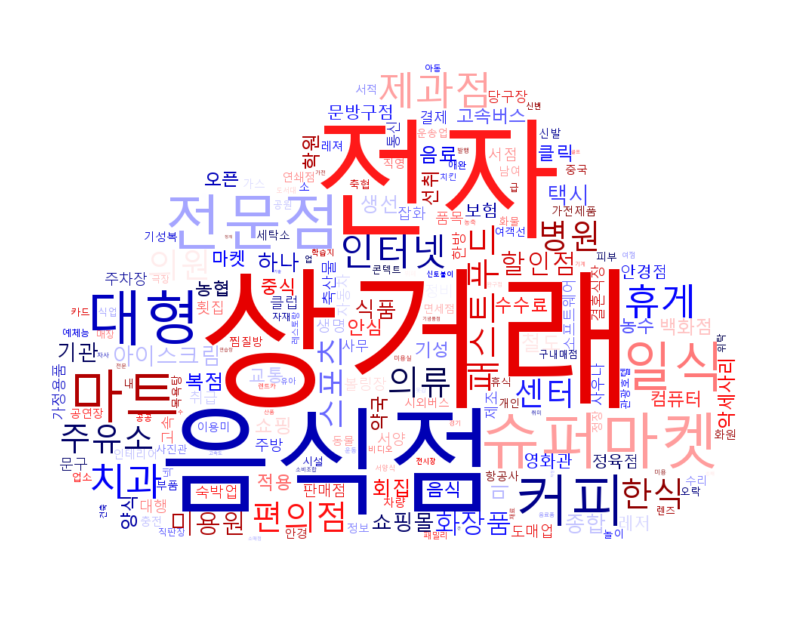

In [216]:
plt.figure(dpi=200)
#fontpath = 'malgun'

wordcloud = WordCloud(font_path='malgun', mask=mask, background_color='white' , colormap='seismic')
wordcloud = wordcloud.generate_from_frequencies(ten_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 연령별 70대 확인

In [74]:
age_grouped_7 = df.groupby('agePrd').get_group('70대')

In [75]:
s_list = []
for a in age_grouped_7['token']:
    s_list += a

In [76]:
s_c = Counter(s_list).most_common()

In [77]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 수단 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분

s_result = []

for w in s_c:
    if w[0] not in stop_words:
        s_result.append(w)
        
s_dict = dict(s_result)

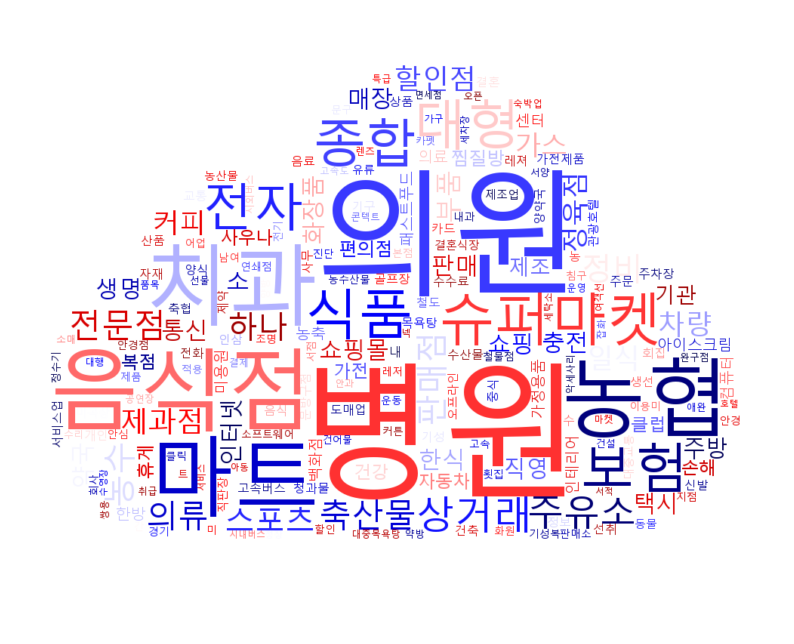

In [78]:
plt.figure(dpi=200)
#fontpath = 'malgun'

wordcloud = WordCloud(font_path='malgun', mask=mask, background_color='white' , colormap='seismic')
wordcloud = wordcloud.generate_from_frequencies(s_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('각 연령별 워드클라우드-70대.png')

## 연령별 80대 확인

In [66]:
age_grouped_8 = df.groupby('agePrd').get_group('80대')
age_grouped_8

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
146920        주유소  차량서비스/차량연료      남      가정친화    80대     160000          2   
146921     의료관련용품   약국및의료기기구매      남      건강관리    80대    4000000          1   
146922     대형할인매장  생활편의시설(유통)      남      여가생활    80대     176150          2   
146923       슈퍼마켓  생활편의시설(유통)      남      여가생활    80대      35880          1   
146924        주유소  차량서비스/차량연료      남      가정친화    80대     159000          2   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
146920  2018      1            80000             [주유소]  
146921  2018      1          4000000      [의료, 관련, 용품]  
146922  2018      1            88075      [대형, 할인, 매장]  
146923  2018      1            35880            [슈퍼마켓]  
146924  2018      2            79500             [주유소]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[697 rows x 11 columns]

In [67]:
e_list = []
for a in age_grouped_8['token']:
    e_list += a

In [68]:
e_c = Counter(e_list).most_common()
e_c

[('점', 84),
 ('일반', 75),
 ('병원', 64),
 ('약국', 51),
 ('슈퍼마켓', 48),
 ('치과', 45),
 ('종합', 42),
 ('마트', 41),
 ('기타', 41),
 ('주유소', 38),
 ('전자', 38),
 ('상거래', 38),
 ('용품', 32),
 ('의원', 32),
 ('한식', 29),
 ('하나', 26),
 ('정육점', 26),
 ('음식점', 25),
 ('주방', 23),
 ('화장품', 23),
 ('대형', 22),
 ('복점', 21),
 ('기성', 19),
 ('한방', 19),
 ('보험', 16),
 ('안심', 16),
 ('클릭', 16),
 ('미', 16),
 ('적용', 16),
 ('생명', 15),
 ('편의점', 15),
 ('제과점', 15),
 ('정수기', 15),
 ('기구', 15),
 ('농수', 14),
 ('축산물', 14),
 ('아이스크림', 13),
 ('가전제품', 10),
 ('가정용품', 10),
 ('안경점', 10),
 ('스포츠', 10),
 ('정비', 10),
 ('차량', 8),
 ('부품', 8),
 ('중식', 7),
 ('인테리어', 7),
 ('백화점', 7),
 ('제조', 7),
 ('제약', 7),
 ('회사', 7),
 ('기기', 6),
 ('관광호텔', 6),
 ('휴게', 6),
 ('농축', 6),
 ('양식', 5),
 ('판매점', 5),
 ('할인점', 5),
 ('교통', 5),
 ('기관', 5),
 ('수수료', 5),
 ('선취', 5),
 ('소매', 5),
 ('건강', 5),
 ('수산물', 5),
 ('자동차', 5),
 ('쇼핑몰', 5),
 ('쇼핑', 5),
 ('의료', 4),
 ('매장', 4),
 ('판매', 4),
 ('클럽', 4),
 ('커피', 4),
 ('전문점', 4),
 ('농협', 4),
 ('식품', 4),
 ('미곡상', 4),
 ('홈', 4),
 ('관

In [69]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 수단 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분

e_result = []

for w in e_c:
    if w[0] not in stop_words:
        e_result.append(w)
        
e_dict = dict(e_result)

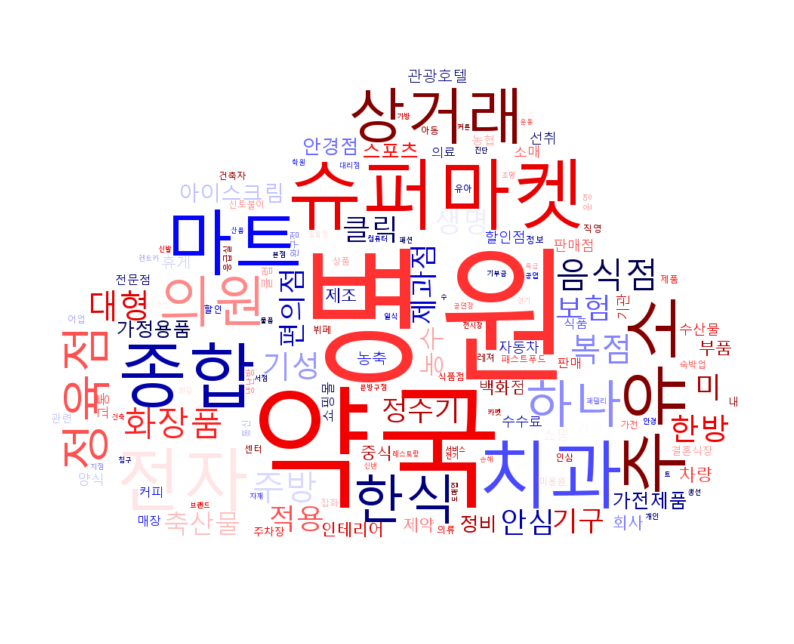

In [71]:
plt.figure(dpi=200)
#fontpath = 'malgun'

wordcloud = WordCloud(font_path='malgun', mask=mask, background_color='white' , colormap='seismic')
wordcloud = wordcloud.generate_from_frequencies(e_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('각 연령별 워드클라우드-80대.png')

## 연령별 나누기

In [313]:
df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식        가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타        가족식사      남      가정친화    10대     100000          4   
2          일식생선회집        가족식사      남      가정친화    10대      12000          1   
3              중식        가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점        가족식사      남      가정친화    10대      30900          4   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
0       2018      1            12000              [양식]  
1       2018      1            25000     [일반, 음식점, 기타]  
2       2018      1            12000      [일식, 생선, 회집]  
3       2018      1            15000              [중식]  
4       2018      1             7725     [커피, 음료, 전문점]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[293786 rows x 11 columns]

In [60]:
age_group = dict(list(df[['agePrd', 'token']].groupby('agePrd')))

In [61]:
age_group

{'10대':        agePrd              token
 0         10대               [양식]
 1         10대      [일반, 음식점, 기타]
 2         10대       [일식, 생선, 회집]
 3         10대               [중식]
 4         10대      [커피, 음료, 전문점]
 ...       ...                ...
 149550    10대          [전자, 상거래]
 149551    10대  [전자, 상거래, 오픈, 마켓]
 149552    10대          [화물, 운송업]
 149553    10대              [사진관]
 149554    10대              [세탁소]
 
 [3613 rows x 2 columns],
 '20대':        agePrd              token
 1550      20대       [기타, 학습, 자재]
 1551      20대       [기타, 사무, 용품]
 1552      20대       [문구, 사무, 용품]
 1553      20대           [문구, 용품]
 1554      20대           [문구, 용품]
 ...       ...                ...
 176503    20대              [세탁소]
 176504    20대           [열쇠, 도장]
 176505    20대           [열쇠, 도장]
 176506    20대  [컴퓨터, 통신, 기기, 수리]
 176507    20대         [온누리, 상품권]
 
 [51377 rows x 2 columns],
 '30대':        agePrd              token
 25974     30대           [간, 음식점]
 25975     30대          [갈비, 전문점]
 259

In [62]:
age_group['10대']['token']

0                      [양식]
1             [일반, 음식점, 기타]
2              [일식, 생선, 회집]
3                      [중식]
4             [커피, 음료, 전문점]
                ...        
149550            [전자, 상거래]
149551    [전자, 상거래, 오픈, 마켓]
149552            [화물, 운송업]
149553                [사진관]
149554                [세탁소]
Name: token, Length: 3613, dtype: object

In [63]:
age_key = age_group.keys()
age_key

dict_keys(['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대'])

In [346]:
age_list = []

for a in age_key:
    age_list.append(age_group[a]['token'])

    for al in age_list:
        age_list += al

0                      [양식]
1             [일반, 음식점, 기타]
2              [일식, 생선, 회집]
3                      [중식]
4             [커피, 음료, 전문점]
                ...        
149550            [전자, 상거래]
149551    [전자, 상거래, 오픈, 마켓]
149552            [화물, 운송업]
149553                [사진관]
149554                [세탁소]
Name: token, Length: 3613, dtype: object
0                      [양식]
1             [일반, 음식점, 기타]
2              [일식, 생선, 회집]
3                      [중식]
4             [커피, 음료, 전문점]
                ...        
149550            [전자, 상거래]
149551    [전자, 상거래, 오픈, 마켓]
149552            [화물, 운송업]
149553                [사진관]
149554                [세탁소]
Name: token, Length: 3613, dtype: object
1550           [기타, 학습, 자재]
1551           [기타, 사무, 용품]
1552           [문구, 사무, 용품]
1553               [문구, 용품]
1554               [문구, 용품]
                ...        
176503                [세탁소]
176504             [열쇠, 도장]
176505             [열쇠, 도장]
176506    [컴퓨터, 통신, 기기, 수리]
176507           [온누리,

## 다른 방법(안됨)

In [247]:
t_list = []
for a in age_key:
    for t in df[df['agePrd']==a]['token']:
        t_list += t

In [248]:
t_list

['양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '패스트푸드',
 '점',
 '한식',
 '제과점',
 '아이스크림',
 '점',
 '가전제품',
 '점',
 '컴퓨터',
 '소프트웨어',
 '주유소',
 '일반',
 '치과',
 '의원',
 '약국',
 '생명',
 '보험',
 '문방구점',
 '서점',
 '교통',
 '기관',
 '수수료',
 '선취',
 '철도',
 '비디오',
 '도서대',
 '여점',
 '공연장',
 '극장',
 '영화관',
 '공공',
 '기관',
 '직영',
 '점',
 '슈퍼마켓',
 '편의점',
 '하나',
 '마트',
 '인터넷',
 '쇼핑몰',
 '전자',
 '상거래',
 '안심',
 '클릭',
 '미',
 '적용',
 '전자',
 '상거래',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '커피',
 '전문점',
 '패밀리',
 '레스토랑',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '제과점',
 '아이스크림',
 '점',
 '기성',
 '복점',
 '농협',
 '주유소',
 '주유소',
 '약국',
 '자동차',
 '학원',
 '서점',
 '종합',
 '스포츠',
 '센터',
 '화장품',
 '점',
 '교통',
 '기관',
 '수수료',
 '선취',
 '고속버스',
 '철도',
 '공공',
 '기관',
 '직영',
 '점',
 '대형',
 '마트',
 '백화점',
 '슈퍼마켓',
 '편의점',
 '인터넷',
 '쇼핑몰',
 '전자',
 '상거래',
 '안심',
 '클릭',
 '미',
 '적용',
 '전자',
 '상거래',
 '가정용품',
 '수리',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집

In [203]:
age_list2 = []
for a in age_key:
    age_list2.append(df.groupby('agePrd').get_group(a)['token'])
    for a in age_list2:
        print(a)

0                      [양식]
1             [일반, 음식점, 기타]
2              [일식, 생선, 회집]
3                      [중식]
4             [커피, 음료, 전문점]
                ...        
149550            [전자, 상거래]
149551    [전자, 상거래, 오픈, 마켓]
149552            [화물, 운송업]
149553                [사진관]
149554                [세탁소]
Name: token, Length: 3613, dtype: object
0                      [양식]
1             [일반, 음식점, 기타]
2              [일식, 생선, 회집]
3                      [중식]
4             [커피, 음료, 전문점]
                ...        
149550            [전자, 상거래]
149551    [전자, 상거래, 오픈, 마켓]
149552            [화물, 운송업]
149553                [사진관]
149554                [세탁소]
Name: token, Length: 3613, dtype: object
1550           [기타, 학습, 자재]
1551           [기타, 사무, 용품]
1552           [문구, 사무, 용품]
1553               [문구, 용품]
1554               [문구, 용품]
                ...        
176503                [세탁소]
176504             [열쇠, 도장]
176505             [열쇠, 도장]
176506    [컴퓨터, 통신, 기기, 수리]
176507           [온누리,

In [211]:
age_list2[0]

0                      [양식]
1             [일반, 음식점, 기타]
2              [일식, 생선, 회집]
3                      [중식]
4             [커피, 음료, 전문점]
                ...        
149550            [전자, 상거래]
149551    [전자, 상거래, 오픈, 마켓]
149552            [화물, 운송업]
149553                [사진관]
149554                [세탁소]
Name: token, Length: 3613, dtype: object

## 각 연령별 워드클라우드 (함수)

In [347]:
df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식        가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타        가족식사      남      가정친화    10대     100000          4   
2          일식생선회집        가족식사      남      가정친화    10대      12000          1   
3              중식        가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점        가족식사      남      가정친화    10대      30900          4   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
0       2018      1            12000              [양식]  
1       2018      1            25000     [일반, 음식점, 기타]  
2       2018      1            12000      [일식, 생선, 회집]  
3       2018      1            15000              [중식]  
4       2018      1             7725     [커피, 음료, 전문점]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[293786 rows x 11 columns]

In [64]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 수단 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분

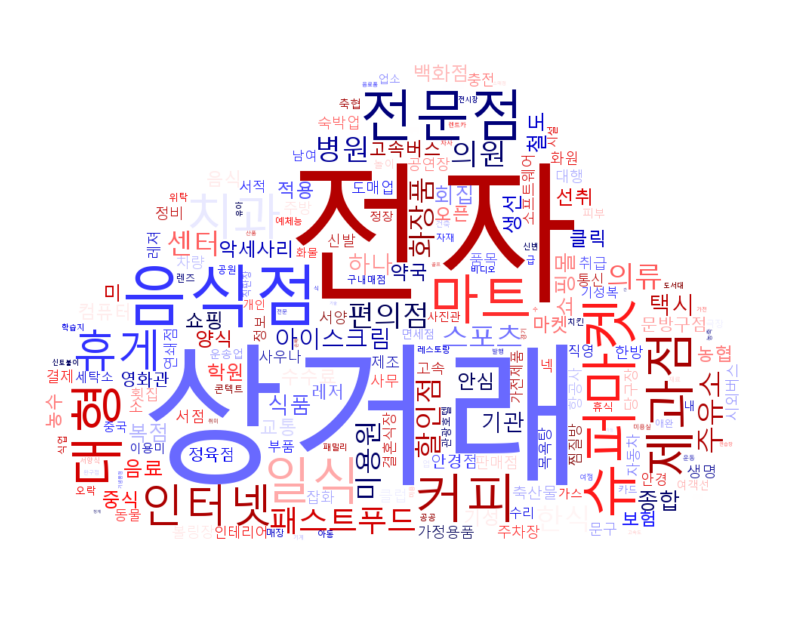

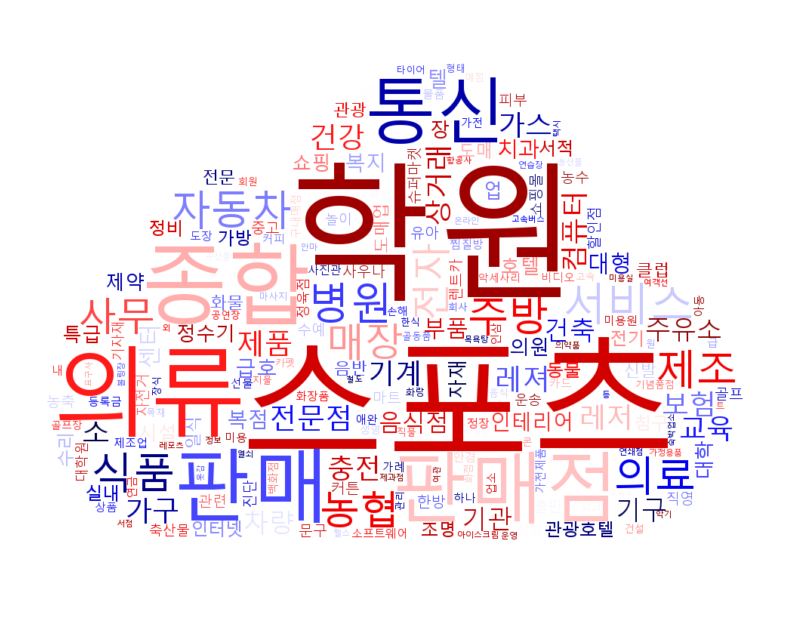

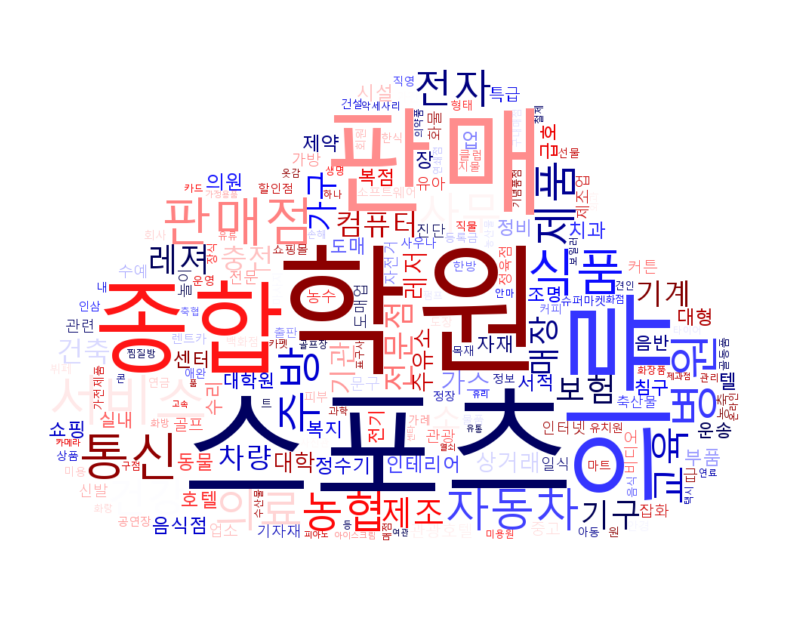

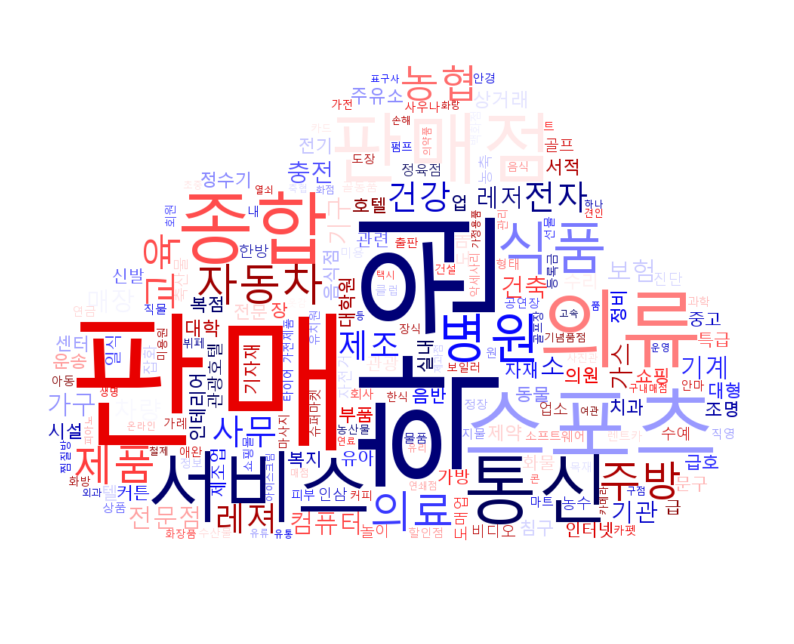

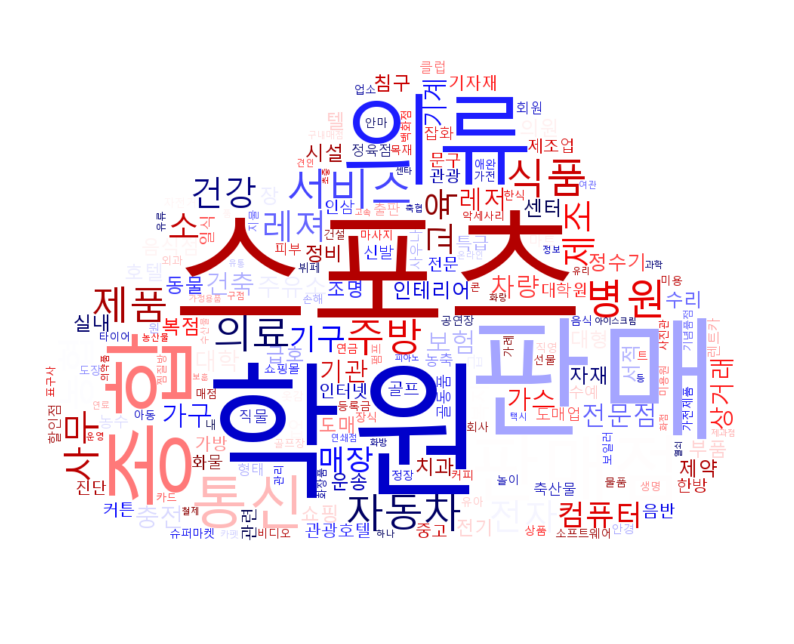

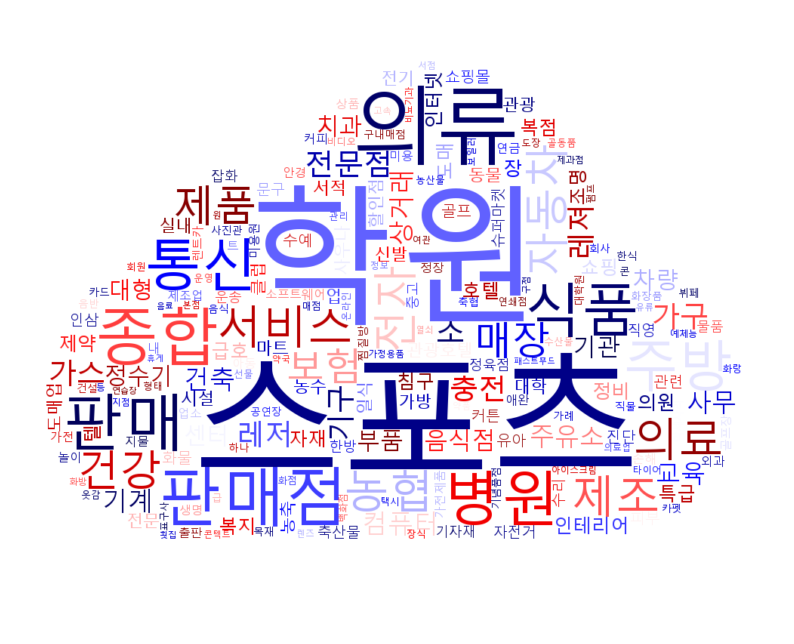

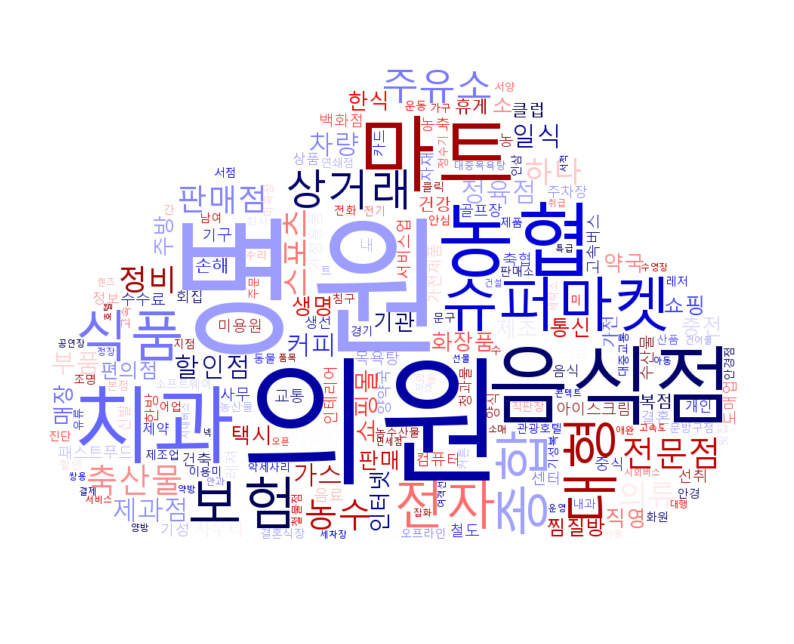

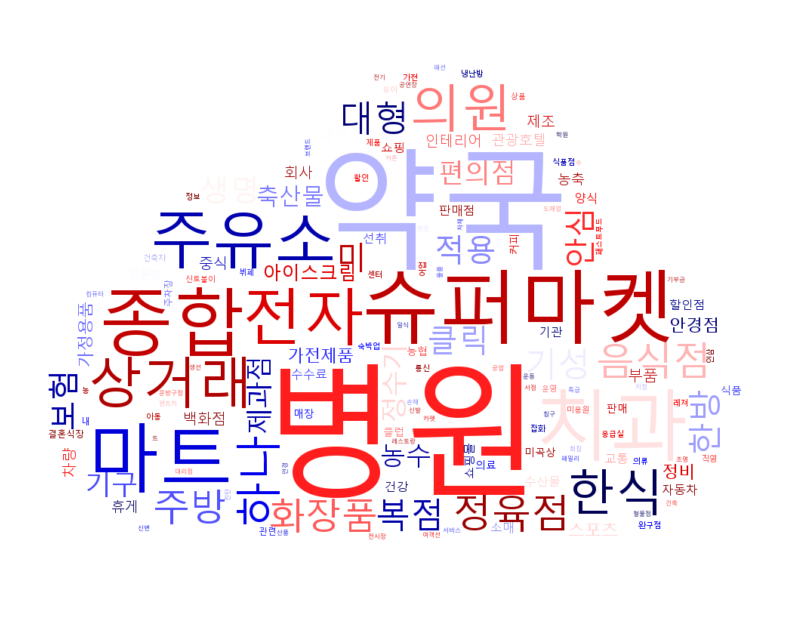

In [65]:
# 오래걸림
age_list = []

for age in age_key:
    age_token = df[df['agePrd']==age]['token']
    
    age_list = []
    for a in age_token:
        age_list += a
        age_c = Counter(age_list).most_common()
        
    age_result = []
    for w in age_c:
        if w[0] not in stop_words:
            age_result.append(w)
    age_dict = dict(age_result)
    plt.figure(dpi=200)

    wordcloud = WordCloud(font_path='malgun', mask=mask, background_color='white' , colormap='seismic')
    wordcloud = wordcloud.generate_from_frequencies(age_dict)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    wordcloud.to_file('각 연령별 워드클라우드.png')

## 10-50대 워드클라우드

In [32]:
df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식        가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타        가족식사      남      가정친화    10대     100000          4   
2          일식생선회집        가족식사      남      가정친화    10대      12000          1   
3              중식        가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점        가족식사      남      가정친화    10대      30900          4   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
0       2018      1            12000              [양식]  
1       2018      1            25000     [일반, 음식점, 기타]  
2       2018      1            12000      [일식, 생선, 회집]  
3       2018      1            15000              [중식]  
4       2018      1             7725     [커피, 음료, 전문점]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[293786 rows x 11 columns]

In [45]:
grouped_1 = df.groupby('agePrd').get_group('10대')
grouped_2 = df.groupby('agePrd').get_group('20대')
grouped_3 = df.groupby('agePrd').get_group('30대')
grouped_4 = df.groupby('agePrd').get_group('40대')
grouped_5 = df.groupby('agePrd').get_group('50대')

In [46]:
grouped_1_5 = pd.concat([grouped_1,grouped_2,grouped_3,grouped_4,grouped_5],ignore_index=False)
grouped_1_5

crdCoBzkNm sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식      가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타      가족식사      남      가정친화    10대     100000          4   
2          일식생선회집      가족식사      남      가정친화    10대      12000          1   
3              중식      가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점      가족식사      남      가정친화    10대      30900          4   
...           ...       ...    ...       ...    ...        ...        ...   
265933       고속버스     여행/교통      여      여가생활    50대    1685100        220   
265934     고속시외버스     여행/교통      여      여가생활    50대   17013100       1208   
265935   고속도로통행카드     여행/교통      여      여가생활    50대    2258150        246   
265936     고속도로카드     여행/교통      여      여가생활    50대   68441906      18916   
265937       고속버스     여행/교통      여      여가생활    50대   27816161       1961   

        Year  Mouth  crdUseAmt_D_Cnt          token  
0       2018      1            12000           [양식]  
1       2018      1            25000  [일반, 음식점, 기타]  
2       2018      1            12000   [일식, 생선, 회집]  
3       2018      1            15000           [중식]  
4       2018      1             7725  [커피, 음료, 전문점]  
...      ...    ...              ...            ...  
265933  2020     12             7659         [고속버스]  
265934  2020     12            14083     [고속, 시외버스]  
265935  2020     12             9179  [고속도, 통행, 카드]  
265936  2020     12             3618      [고속도, 카드]  
265937  2020     12            14184         [고속버스]  

[231764 rows x 11 columns]

In [47]:
grouped_1_5.tail(10)

crdCoBzkNm sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
265928          화장품        미용      여      여가생활    50대   12288694        219   
265929          화장품        미용      여      여가생활    50대  141986081       2281   
265930         화장품점        미용      여      여가생활    50대  235114754       3952   
265931         PG택시     여행/교통      여      여가생활    50대     130000         23   
265932  RF교통기관수수료선취     여행/교통      여      여가생활    50대   60210980       7560   
265933         고속버스     여행/교통      여      여가생활    50대    1685100        220   
265934       고속시외버스     여행/교통      여      여가생활    50대   17013100       1208   
265935     고속도로통행카드     여행/교통      여      여가생활    50대    2258150        246   
265936       고속도로카드     여행/교통      여      여가생활    50대   68441906      18916   
265937         고속버스     여행/교통      여      여가생활    50대   27816161       1961   

        Year  Mouth  crdUseAmt_D_Cnt              token  
265928  2020     12            56112              [화장품]  
265929  2020     12            62247              [화장품]  
265930  2020     12            59492           [화장품, 점]  
265931  2020     12             5652               [택시]  
265932  2020     12             7964  [교통, 기관, 수수료, 선취]  
265933  2020     12             7659             [고속버스]  
265934  2020     12            14083         [고속, 시외버스]  
265935  2020     12             9179      [고속도, 통행, 카드]  
265936  2020     12             3618          [고속도, 카드]  
265937  2020     12            14184             [고속버스]

In [48]:
gr5_list = []
for a in grouped_1_5['token']:
    gr5_list += a

In [50]:
gr5_c = Counter(gr5_list).most_common()

In [51]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 수단 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분

gr5_result = []

for w in gr5_c:
    if w[0] not in stop_words:
        gr5_result.append(w)

In [52]:
gr5_dict = dict(gr5_result)

In [85]:
mask_kid = Image.open("data/kid.png")
mask_kid = np.array(mask_kid)

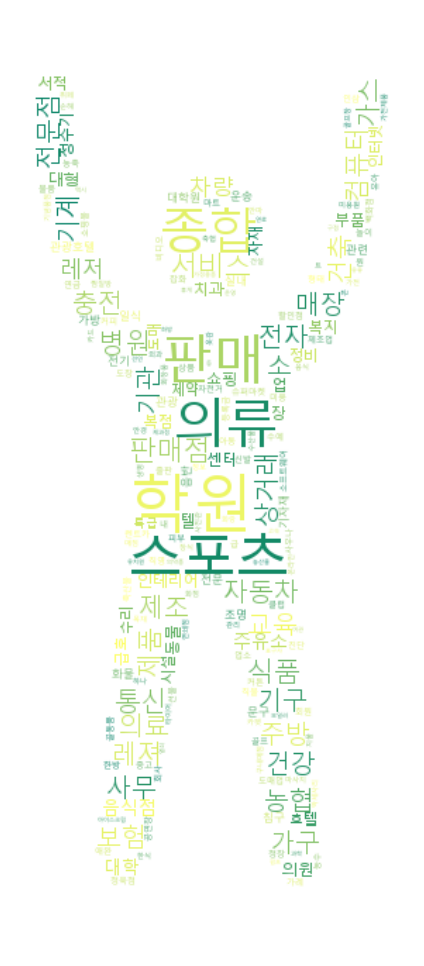

In [122]:
plt.figure(dpi=300)
#fontpath = 'malgun'

wordcloud = WordCloud(font_path='malgun', mask=mask_kid, background_color='white', colormap='summer_r')  # YlGn summer_r Greens gist_earth_r
wordcloud = wordcloud.generate_from_frequencies(gr5_dict) 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
wordcloud.to_file('10대-50대 워드클라우드7.png')
plt.show()

## 60-80대 워드클라우드

In [94]:
grouped_6 = df.groupby('agePrd').get_group('60대')
grouped_7 = df.groupby('agePrd').get_group('70대')
grouped_8 = df.groupby('agePrd').get_group('80대')

In [95]:
grouped_6_8 = pd.concat([grouped_6,grouped_7,grouped_8],ignore_index=False)
grouped_6_8

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
113318      신경정신과       병의원진료      남      건강관리    60대     411200         12   
113319         안과       병의원진료      남      건강관리    60대   20248450        122   
113320       양방종합       병의원진료      남      건강관리    60대  119262136        846   
113321      양한방종합       병의원진료      남      건강관리    60대    3663190         19   
113322         외과       병의원진료      남      건강관리    60대    2413520         15   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
113318  2018      1            34266         [신경, 정신과]  
113319  2018      1           165970              [안과]  
113320  2018      1           140971          [양방, 종합]  
113321  2018      1           192799          [한방, 종합]  
113322  2018      1           160901              [외과]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[62022 rows x 11 columns]

In [96]:
gr8_list = []
for a in grouped_6_8['token']:
    gr8_list += a

In [97]:
gr8_c = Counter(gr8_list).most_common()

In [98]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 수단 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분

gr8_result = []

for w in gr8_c:
    if w[0] not in stop_words:
        gr8_result.append(w)

In [99]:
gr8_dict = dict(gr8_result)

In [100]:
mask_Ad = Image.open("data/Ad.png")
mask_Ad = np.array(mask_Ad)

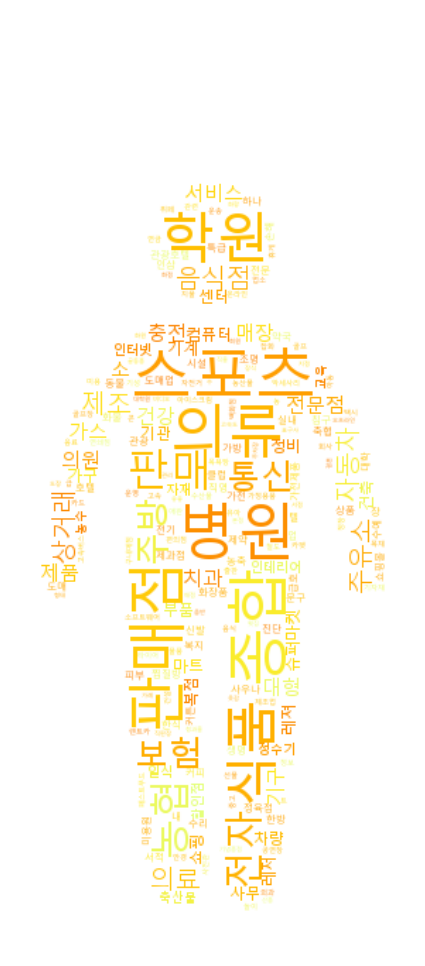

In [112]:
plt.figure(dpi=300)
#fontpath = 'malgun'

wordcloud = WordCloud(font_path='malgun', mask=mask_Ad, background_color='white', colormap='Wistia')
wordcloud = wordcloud.generate_from_frequencies(gr8_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
wordcloud.to_file('60대-80대 워드클라우드4.png')
plt.show()

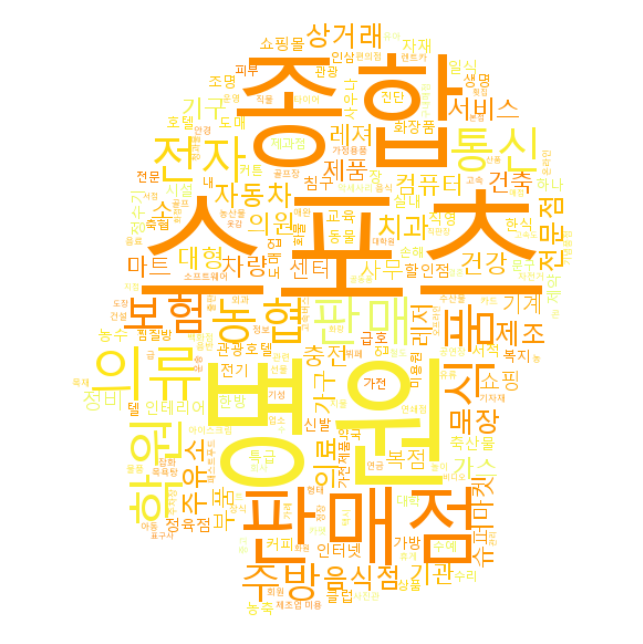

In [113]:
plt.figure(dpi=200)
#fontpath = 'malgun'

wordcloud = WordCloud(font_path='malgun', mask=mask_head, background_color='white', colormap='Wistia')
wordcloud = wordcloud.generate_from_frequencies(gr8_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
wordcloud.to_file('60대-80대 워드클라우드4.png')
plt.show()